In [0]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt
from PIL import Image

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

# Fine grained data classification

In [5]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [4]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [8]:
path_anno = path/'annotations'
path_img = path/'images'
path_anno, path_img

(PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images'))

# View data

In [9]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_77.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_68.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_107.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_165.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_59.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms = get_transforms(),size = 224)
data.normalize(imagenet_stats)

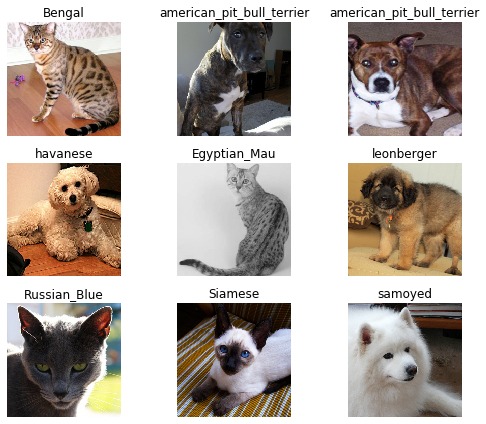

In [16]:
data.show_batch(rows = 3, figsize = (7,6))

In [17]:
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [22]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.376788,0.329506,0.105548,01:41
1,0.628815,0.305574,0.094046,01:41
2,0.389474,0.254247,0.075101,01:41
3,0.293343,0.237189,0.079161,01:41


In [0]:
learn.save('stage-1')

# Results

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

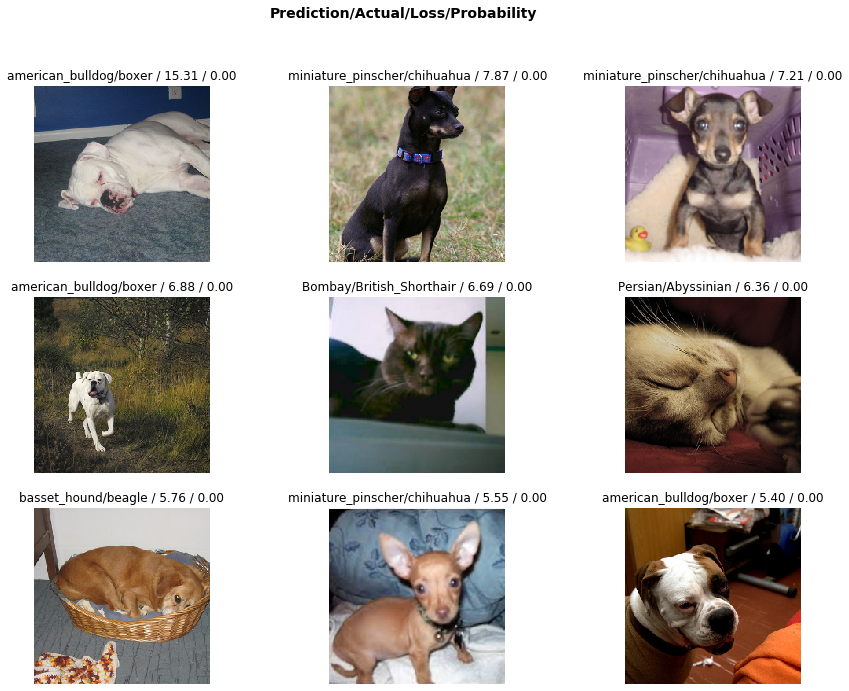

In [29]:
interp.plot_top_losses(9, figsize = (15,11))

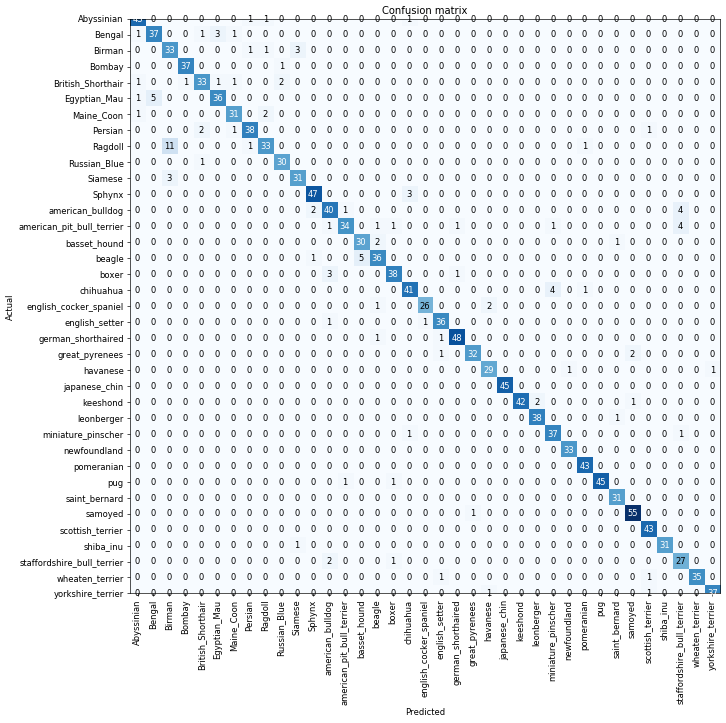

In [30]:
interp.plot_confusion_matrix(figsize = (12,12),dpi = 60)

In [31]:
interp.most_confused(min_val =2 )

[('Ragdoll', 'Birman', 11),
 ('Egyptian_Mau', 'Bengal', 5),
 ('beagle', 'basset_hound', 5),
 ('american_bulldog', 'staffordshire_bull_terrier', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Birman', 'Siamese', 3),
 ('Siamese', 'Birman', 3),
 ('Sphynx', 'chihuahua', 3),
 ('boxer', 'american_bulldog', 3),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Persian', 'British_Shorthair', 2),
 ('american_bulldog', 'Sphynx', 2),
 ('basset_hound', 'beagle', 2),
 ('english_cocker_spaniel', 'havanese', 2),
 ('great_pyrenees', 'samoyed', 2),
 ('keeshond', 'leonberger', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

# Fine tuning

## Train the entire model 
- Till now sort of just used transfer and sort of added new layers and trained

In [0]:
learn.unfreeze()

In [33]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.679460,0.344067,0.112991,01:45


In [0]:
learn.load('stage-1')

## Fastest learning rate find

In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


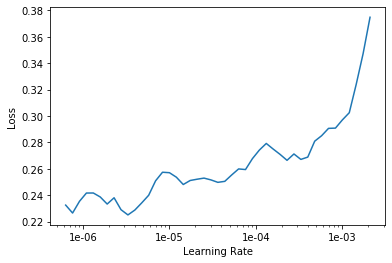

In [36]:
learn.recorder.plot()

## Choose lr from graph
- Plot of loss vs rate
- So basically take a range of values before the loss becomes really really high

In [37]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.245233,0.233889,0.075778,01:46
1,0.211364,0.224142,0.073748,01:46


# Further improvements
- Using resnet 50 will give much better results